In [ ]:
pip install neattext


     |████████████████████████████████| 114 kB 4.1 MB/s 


In [ ]:
#Load package
import pandas as pd
import numpy as np
import matplotlib.pyplot as ply
import seaborn as sns
import neattext.functions as nfx

In [ ]:
data = pd.read_csv('/content/data.csv')
data.head()

,text,sentiment
0,@angelemotion yayyy for new videos by amazing ...,happiness
1,Surgery when I wake up,neutral
2,@ScylisSynaptic NO WAY MAN! i like 21 year olds,surprise
3,Just look @ this hellacious desk...good grief ...,hate
4,@ModelTheany tee we beefin....what was u supp...,surprise


In [ ]:
data.shape

(32000, 2)

In [ ]:
data.columns

Index(['text', 'sentiment'], dtype='object')

In [ ]:
data.isna().sum()

text         0
sentiment    0
dtype: int64

In [ ]:
data['sentiment'].value_counts()

neutral       6910
worry         6767
happiness     4167
sadness       4132
love          3074
surprise      1750
fun           1421
relief        1221
hate          1058
empty          662
enthusiasm     607
boredom        143
anger           88
Name: sentiment, dtype: int64

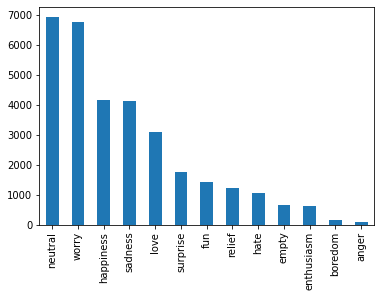

In [ ]:
data['sentiment'].value_counts().plot(kind='bar')

In [ ]:
# sentiment analysis
from textblob import TextBlob

In [ ]:
def senti(text):
  blob= TextBlob(text)
  sentiment = blob.sentiment.polarity
  if(sentiment > 0):
    res= 'Positive'
  elif(sentiment < 0 ):
    res = 'Negative'
  else:
    res = 'Neutral'
  return res

In [ ]:
data['emotion'] = data['text'].apply(senti)


In [ ]:
data.head()

,text,sentiment,emotion
0,@angelemotion yayyy for new videos by amazing ...,happiness,Positive
1,Surgery when I wake up,neutral,Neutral
2,@ScylisSynaptic NO WAY MAN! i like 21 year olds,surprise,Neutral
3,Just look @ this hellacious desk...good grief ...,hate,Negative
4,@ModelTheany tee we beefin....what was u supp...,surprise,Neutral


In [ ]:
# compare sentiment vs emotion

data.groupby(['sentiment','emotion']).size()

sentiment   emotion 
anger       Negative      27
            Neutral       33
            Positive      28
boredom     Negative      67
            Neutral       42
            Positive      34
empty       Negative     142
            Neutral      326
            Positive     194
enthusiasm  Negative      82
            Neutral      203
            Positive     322
fun         Negative     160
            Neutral      380
            Positive     881
happiness   Negative     270
            Neutral      993
            Positive    2904
hate        Negative     552
            Neutral      294
            Positive     212
love        Negative     173
            Neutral      543
            Positive    2358
neutral     Negative     944
            Neutral     3546
            Positive    2420
relief      Negative     174
            Neutral      374
            Positive     673
sadness     Negative    1508
            Neutral     1351
            Positive    1273
surprise    Negative  

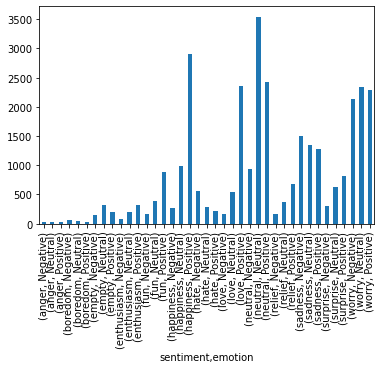

In [ ]:
data.groupby(['sentiment','emotion']).size().plot(kind='bar')

In [ ]:
## text clasification

# remove noise


In [ ]:
data['clean_text']=data['text'].apply(nfx.remove_stopwords)

In [ ]:
data['clean_text']=data['text'].apply(nfx.remove_userhandles)

In [ ]:
data['clean_text']=data['clean_text'].apply(nfx.remove_punctuations)


In [ ]:
data['clean_text']=data['clean_text'].apply(nfx.remove_currency)

In [ ]:
data['clean_text']=data['clean_text'].apply(nfx.remove_currency_symbols)

In [ ]:
data['clean_text']=data['clean_text'].apply(nfx.remove_dates)

In [ ]:
data['clean_text']=data['clean_text'].apply(nfx.remove_hashtags)

In [ ]:
data['clean_text']=data['clean_text'].apply(nfx.remove_urls)

In [ ]:
data['clean_text']=data['clean_text'].apply(nfx.remove_terms_in_bracket)

In [ ]:
for i in data['clean_text']:
  print('')
  print(i)
#remove_terms_in_bracket

Streaming output truncated to the last 5000 lines.

what do u do when ur dads losing it mentaly and dosent remeber you

  thats stunning

FUCK FUCK FUCK FUCK   please comment me back  ILY

  ahhh haha  thanks for clarifying

GRRRR Its BACK And what I mean is my headache  But on the *       *        bright sideits only on one side /\/\/\/\/\

  well then you can do what you want and not what visitors want you to find out : can be a +

is NOT watching Star Trek tonight But is heading to a lovely dinner and fun board games night with  

homeee my feet are sore

  I dont know how you do it

is not paying ï¿½8 per hr for Internet access so may be limited to Twitter via txt

Happy Mothers DayI had a gr8 day with my kids amp my MUM

Just got back from 5km run  It was really good

Hopes every1 had a nice mothers day

Happy Mothers day to all the wonderful mommies out there  I LOVE YOU MOM

Incase I forget Happy Mothers Day to all you moms out there and to my mommy The very best one in the worl

In [ ]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [ ]:
data.head()

,text,sentiment,emotion,clean_text
0,@angelemotion yayyy for new videos by amazing ...,happiness,Positive,yayyy for new videos by amazing people
1,Surgery when I wake up,neutral,Neutral,Surgery when I wake up
2,@ScylisSynaptic NO WAY MAN! i like 21 year olds,surprise,Neutral,NO WAY MAN i like 21 year olds
3,Just look @ this hellacious desk...good grief ...,hate,Negative,Just look @ this hellacious deskgood grief ht...
4,@ModelTheany tee we beefin....what was u supp...,surprise,Neutral,tee we beefinwhat was u supposed to do befo...


In [ ]:
# keyword extraction
#most common word extration

In [ ]:
from collections import Counter

In [ ]:
def extract(text,num=50):
  tokens = [ tok for tok in text.split()]
  most_tok = Counter(tokens).most_common(num)
  return dict(most_tok)


In [ ]:
senti_list = data['sentiment'].unique().tolist()

In [ ]:
senti_list

['happiness',
 'neutral',
 'surprise',
 'hate',
 'love',
 'sadness',
 'worry',
 'relief',
 'fun',
 'empty',
 'enthusiasm',
 'boredom',
 'anger']

In [ ]:
happy_list=data[data['sentiment'] == 'happiness']['clean_text']

In [ ]:
happy_doc = ' '.join(happy_list)
happy_doc

'  yayyy for new videos by amazing people No 10th  2 months=] is going to watch the two davids yey   Oh wow  Thanks for the info Mariana ~ Photography by Cassones May 2009 Feature http://bitly/E2bjm   Thanks so much Goooood beer tiiiimes    awesome   Ill have to keep a look out for it one of my favorite most relaxing songs to wake up to: http://tinyurlcom/c8fr3e Good morning http://twitpiccom/4w855 Operation Happy Mom a success NITE PEOPLES Everyone going to the hometown show is excited they get to go on Thames Street IM GONNA SEE THE ORIGINAL THAMES RIVER BITCH ohhhh Looking forward to Sunday b/c the weather should be warm and sunny getting ready to lay out by the pool   I just KNEW youd get that   haha i told you its not important Oh yeah Radio1 is SO playing Earth Wind and Fire     great pichave to upload my pix tomoIve no laptop tonight picture to burn  taylor swift    great song   thanks for havin us overrr Woo hoo party over here Its gonna be fun Ive brush my teeth but im eating 

In [ ]:
keyword_happy= extract(happy_doc)

In [ ]:
keyword_happy

{'I': 1035,
 'Im': 261,
 'a': 1093,
 'all': 217,
 'and': 750,
 'are': 193,
 'at': 262,
 'be': 305,
 'but': 199,
 'day': 371,
 'for': 649,
 'from': 160,
 'fun': 161,
 'get': 156,
 'go': 152,
 'good': 336,
 'got': 165,
 'great': 202,
 'had': 152,
 'happy': 164,
 'have': 312,
 'i': 502,
 'im': 147,
 'in': 516,
 'is': 503,
 'it': 555,
 'its': 230,
 'just': 245,
 'like': 185,
 'me': 313,
 'my': 709,
 'night': 150,
 'now': 181,
 'of': 506,
 'on': 408,
 'out': 215,
 'see': 148,
 'so': 333,
 'that': 309,
 'the': 1298,
 'this': 190,
 'time': 151,
 'to': 1393,
 'today': 199,
 'too': 146,
 'up': 186,
 'was': 352,
 'with': 394,
 'you': 721,
 'your': 169}

In [ ]:
def plot_common_word(dict1):
  data1=pd.DataFrame(dict1.items(),columns=['token','count'])
  ply.figure(figsize=(20,10))
  sns.barplot(x='token',y='count',data=data1)
  ply.xticks(rotation=45)
  ply.show()

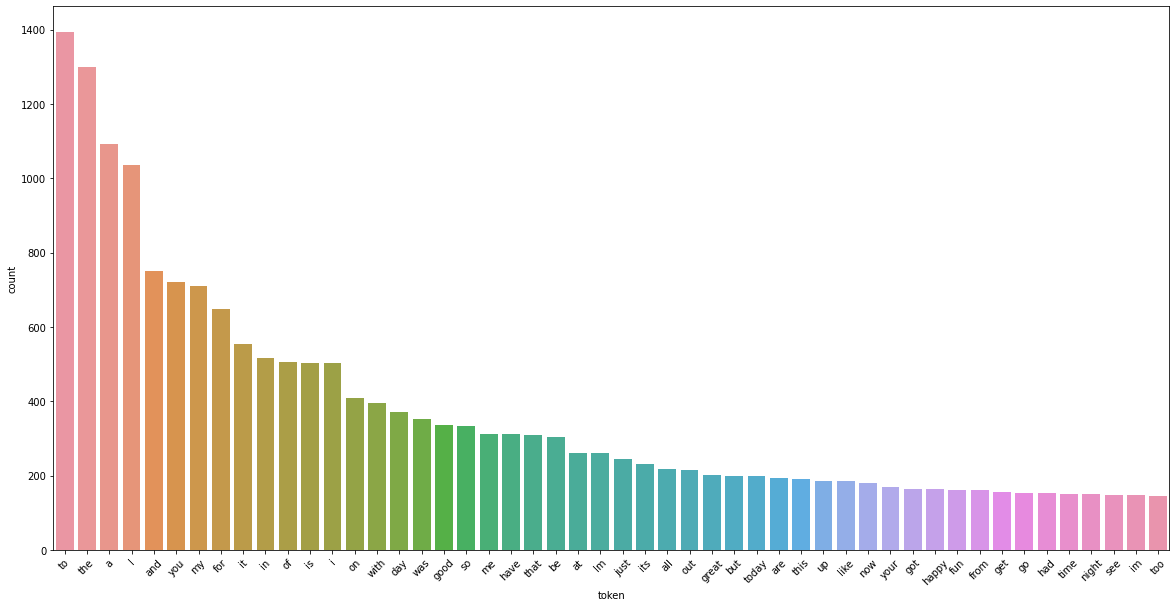

In [ ]:
plot_common_word(keyword_happy)

In [ ]:
# Model selection


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,plot_confusion_matrix


In [ ]:
# split data
from sklearn.model_selection import train_test_split

In [ ]:
X = data['clean_text']
Y = data['sentiment']

In [ ]:
#vectorizer
cv=CountVectorizer()
X=cv.fit_transform(X)

In [ ]:
cv.get_feature_names()

In [ ]:
#split dataset
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state=42)


In [ ]:
#build model

nv= MultinomialNB()
nv.fit( X_train , y_train )

MultinomialNB()

In [ ]:
#Accuracy
nv.score(X_test,y_test)

0.30854166666666666

In [ ]:
#prediction
y_pred = nv.predict(X_test)

In [ ]:
y_pred

array(['neutral', 'neutral', 'neutral', ..., 'love', 'worry', 'worry'],
      dtype='<U10')

In [ ]:
##make a single prediction
sample_text = ['I happy today']


In [ ]:
vec = cv.transform(sample_text).toarray()

In [ ]:
nv.predict(vec)

array(['happiness'], dtype='<U10')

In [ ]:
# prediction prob 
nv.predict_proba(vec)

array([[2.02528333e-06, 1.07594653e-05, 3.33264669e-04, 8.41976188e-04,
        4.57195753e-03, 4.14366245e-01, 7.99558420e-04, 2.52698867e-01,
        1.28559942e-01, 1.14277377e-02, 5.70319363e-02, 1.00602974e-02,
        1.19295433e-01]])

In [ ]:
nv.classes_

array(['anger', 'boredom', 'empty', 'enthusiasm', 'fun', 'happiness',
       'hate', 'love', 'neutral', 'relief', 'sadness', 'surprise',
       'worry'], dtype='<U10')

In [ ]:
np.max(nv.predict_proba(vec))

0.41436624500500435

In [ ]:
print(classification_report(y_test,y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       anger       0.00      0.00      0.00        24
     boredom       0.00      0.00      0.00        43
       empty       0.29      0.01      0.02       164
  enthusiasm       0.00      0.00      0.00       186
         fun       0.00      0.00      0.00       438
   happiness       0.33      0.29      0.31      1208
        hate       0.11      0.00      0.01       322
        love       0.53      0.25      0.34       943
     neutral       0.34      0.37      0.35      2120
      relief       0.00      0.00      0.00       388
     sadness       0.27      0.10      0.15      1206
    surprise       0.00      0.00      0.00       525
       worry       0.28      0.72      0.40      2033

    accuracy                           0.31      9600
   macro avg       0.16      0.13      0.12      9600
weighted avg       0.27      0.31      0.25      9600



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
confusion_matrix(y_test,y_pred)

array([[   0,    0,    0,    0,    0,    0,    0,    0,    5,    0,    1,
           0,   18],
       [   0,    0,    0,    0,    0,    0,    0,    0,   10,    0,    5,
           0,   28],
       [   0,    0,    2,    0,    0,   12,    0,    1,   59,    0,   10,
           1,   79],
       [   0,    0,    0,    0,    0,   17,    0,    6,   52,    0,   13,
           0,   98],
       [   0,    0,    0,    0,    0,   89,    0,   10,  127,    0,    8,
           1,  203],
       [   0,    0,    1,    0,    0,  346,    1,   65,  315,    1,   27,
           2,  450],
       [   0,    0,    0,    0,    0,    8,    1,    5,   52,    0,   38,
           0,  218],
       [   0,    0,    0,    0,    1,  195,    1,  234,  167,    0,   17,
           1,  327],
       [   0,    0,    3,    0,    5,  175,    3,   55,  790,    2,   73,
           8, 1006],
       [   0,    0,    1,    0,    0,   41,    0,   10,  115,    0,   16,
           0,  205],
       [   0,    0,    0,    0,    0,   32,    2, 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


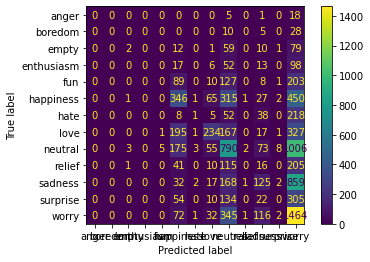

In [ ]:
plot_confusion_matrix(nv,X_test,y_test)

In [ ]:
# predict emotion with user inputs
def predict_senti(sample_text,model):
  myvec= cv.transform(sample_text).toarray()
  pred=model.predict(myvec)
  pred_proba = model.predict_proba(myvec)
  pred_per = dict(zip(model.classes_,pred_proba))
  print(f'sentiment  --> {pred[0]}')
  return pred_per

In [ ]:
sample_text = input(' Please provide the sentence ')
sample_text = [sample_text]
predict_senti(sample_text,nv)

 Please provide the sentence I want to die
sentiment  --> worry


{'anger': array([2.91417082e-06, 5.15241628e-06, 2.83997395e-04, 4.81812295e-04,
        4.05434682e-03, 2.81131015e-02, 3.88061351e-03, 1.61565680e-02,
        1.55807978e-01, 1.03427923e-03, 2.81649749e-01, 4.59545592e-03,
        5.03934032e-01])}